### COCO Dataset

- Common Objects in Context
- 200,000개의 이미지 
- 80개의 카테고리에 500,000개 이상의 객체 Annotation이 존재
      person
      bicycle
      car
      motorbike
      aeroplane
      bus
      train
      truck
      boat
      traffic light
      fire hydrant
      stop sign
      parking meter
      bench
      bird
      cat
      dog
      horse
      sheep
      cow
      elephant
      bear
      zebra
      giraffe
      backpack
      umbrella
      handbag
      tie
      suitcase
      frisbee
      skis
      snowboard
      sports ball
      kite
      baseball bat
      baseball glove
      skateboard
      surfboard
      tennis racket
      bottle
      wine glass
      cup
      fork
      knife
      spoon
      bowl
      banana
      apple
      sandwich
      orange
      broccoli
      carrot
      hot dog
      pizza
      donut
      cake
      chair
      sofa
      pottedplant
      bed
      diningtable
      toilet
      tvmonitor
      laptop
      mouse
      remote
      keyboard
      cell phone
      microwave
      oven
      toaster
      sink
      refrigerator
      book
      clock
      vase
      scissors
      teddy bear
      hair drier
      toothbrush
      
- https://cocodataset.org/

<img src="https://cocodataset.org/images/coco-examples.jpg">



# 객체 탐지 (Object Detection)의 역사

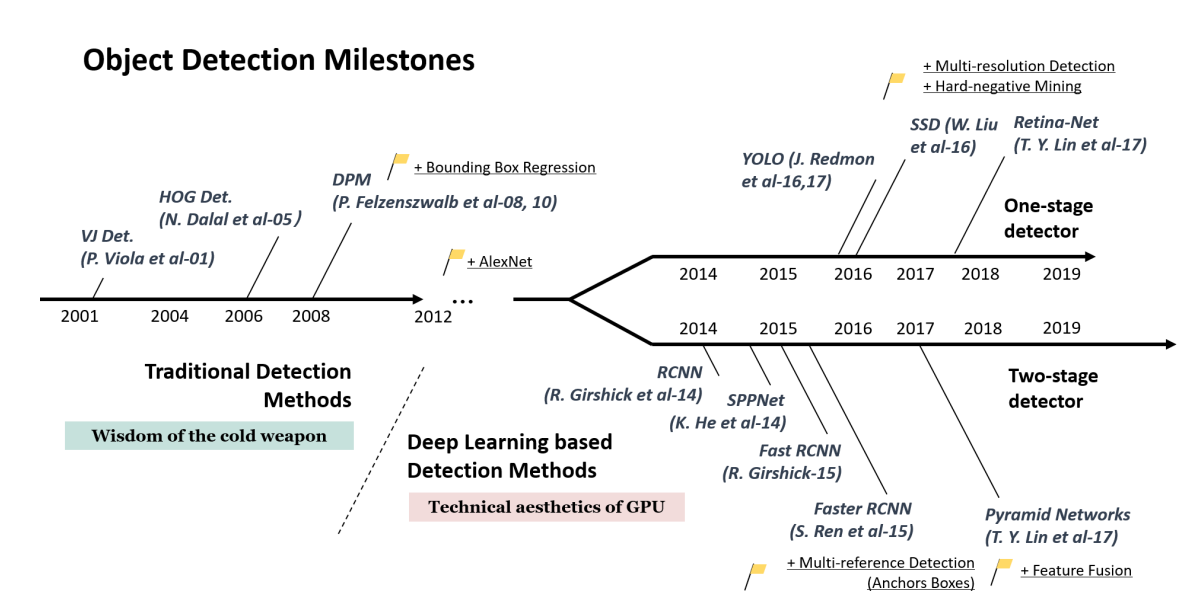

# YOLO (You Only Look Once)

- 가장 빠른 객체 검출 알고리즘 중 하나
- 256x256 사이즈의 이미지
- 파이썬, 텐서플로 기반 프레임워크가 아닌 C++로 구현된 코드 기준 GPU 사용 시, 초당 170 프레임(170 FPS, frames per second)
- 작은 크기의 물체를 탐지하는데는 어려움

<img src="https://miro.medium.com/max/1400/1*bSLNlG7crv-p-m4LVYYk3Q.png" width="600">

- https://pjreddie.com/darknet/yolo/
- https://www.youtube.com/watch?v=MPU2HistivI

## YOLO 아키텍처

- 백본 모델(backbone model) 기반
- 특징 추출기(Feature Extractor)라고도 불림
- YOLO는 자체 맞춤 아키텍쳐 사용

  <img src="https://user-images.githubusercontent.com/26322627/70716343-8e857200-1d2f-11ea-8e60-9c75f24ca9ce.png">

- 어떤 특징 추출기 아키텍쳐를 사용했는지에 따라 성능 달라짐

  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">

- 마지막 계층은 크기가 $w \times h \times D$인 특징 볼륨 출력
- $w \times h $는 그리드의 크기이고, $D$는 특징 볼륨 깊이



## YOLOv5 모델 (PyTorch)

* https://github.com/ultralytics/yolov5
* https://www.ultralytics.com

### 모델 다운로드

In [4]:
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14156, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 14156 (delta 11), reused 19 (delta 8), pack-reused 14130
Receiving objects: 100% (14156/14156), 13.48 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (9728/9728), done.


In [5]:
%cd yolov5
%pip install -qr requirements.txt #파이썬 버전 맞추기

import torch
from IPython.display import Image, clear_output

/content/yolov5
     |████████████████████████████████| 182 kB 15.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 65.0 MB/s 


### 추론(Inference)

`detect.py`: YOLOv5 모델을 이용한 추론

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
!ls /content/drive/MyDrive/yolo_lguplus/frames #kaggle data set 파일 위치 읽어오기

seq_000001.jpg	seq_000401.jpg	seq_000801.jpg	seq_001201.jpg	seq_001601.jpg
seq_000002.jpg	seq_000402.jpg	seq_000802.jpg	seq_001202.jpg	seq_001602.jpg
seq_000003.jpg	seq_000403.jpg	seq_000803.jpg	seq_001203.jpg	seq_001603.jpg
seq_000004.jpg	seq_000404.jpg	seq_000804.jpg	seq_001204.jpg	seq_001604.jpg
seq_000005.jpg	seq_000405.jpg	seq_000805.jpg	seq_001205.jpg	seq_001605.jpg
seq_000006.jpg	seq_000406.jpg	seq_000806.jpg	seq_001206.jpg	seq_001606.jpg
seq_000007.jpg	seq_000407.jpg	seq_000807.jpg	seq_001207.jpg	seq_001607.jpg
seq_000008.jpg	seq_000408.jpg	seq_000808.jpg	seq_001208.jpg	seq_001608.jpg
seq_000009.jpg	seq_000409.jpg	seq_000809.jpg	seq_001209.jpg	seq_001609.jpg
seq_000010.jpg	seq_000410.jpg	seq_000810.jpg	seq_001210.jpg	seq_001610.jpg
seq_000011.jpg	seq_000411.jpg	seq_000811.jpg	seq_001211.jpg	seq_001611.jpg
seq_000012.jpg	seq_000412.jpg	seq_000812.jpg	seq_001212.jpg	seq_001612.jpg
seq_000013.jpg	seq_000413.jpg	seq_000813.jpg	seq_001213.jpg	seq_001613.jpg
seq_000014.jpg	seq_000414

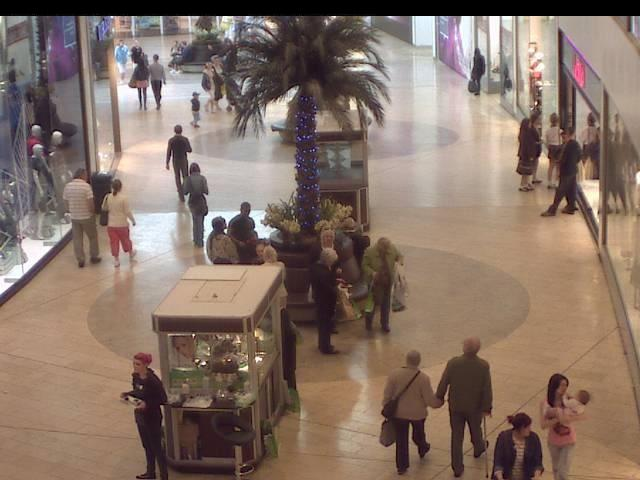

In [43]:
# test 할 데이터 1개 sample로 불러오기 
Image(filename = '/content/drive/MyDrive/yolo_lguplus/frames/seq_000001.jpg', width = 600)

### 추론(Inference)

In [84]:
# COCO dataset으로 학습한 weight 가져와서 people만 출력하게 설정함 
## people만 출력 되게 한 옵션 : --classes 0
## confidence score(0~1) : --conf 0.1 <- conf값을 올리면 예측이 까다로워짐
## 빨간 네모 박스 두께 : --line-thickness 2
## people label 출력안함 : --hide-labels
## 예측 confidence score 출력안함 : --hide-conf
## --save-txt : runs/detect/exp/labels 폴더에 저장됨 각각 사진마다의 bounding box의 x중심값 y중심값 width height confidence_score 나타냄.
## --save-crop : runs/detect/exp/crops 폴더에 저장됨 (사람만 탐지한 crop한 이미지 저장)
## --source : 테스트할 데이터 폴더 위치

!python detect.py --weights yolov5s.pt --img 640 --conf 0.1 --line-thickness 2 --hide-labels --hide-conf --classes 0 --save-txt --save-crop --source /content/drive/MyDrive/yolo_lguplus/sample 

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/yolo_lguplus/sample, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/8 /content/drive/MyDrive/yolo_lguplus/sample/seq_000001.jpg: 480x640 26 persons, 11.7ms
image 2/8 /content/drive/MyDrive/yolo_lguplus/sample/seq_000002.jpg: 480x640 31 persons, 10.7ms
image 3/8 /content/drive/MyDrive/yolo_lguplus/sample/seq_000003.jpg: 480x640 29 persons, 10.7ms
image 4/8 /content/drive/MyDrive/yolo_lguplus/sample/seq_000004.jpg: 480x6

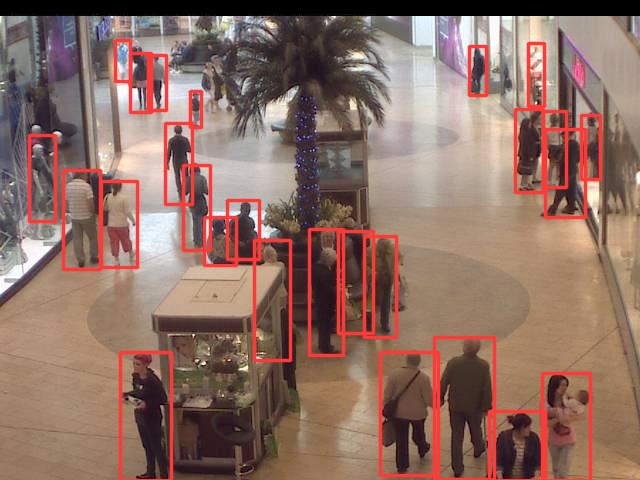

In [81]:
# test 결과 출력 예시1
Image(filename = 'runs/detect/exp13/seq_000001.jpg', width = 600)

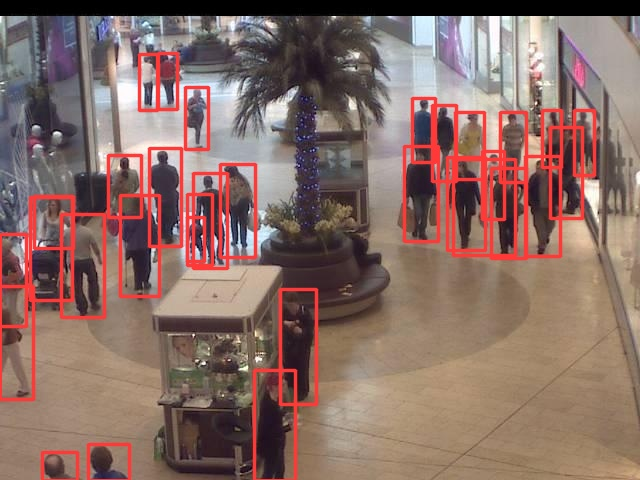

In [89]:
import glob
import random 
# 랜덤으로 출력 ~
## 전체 학습완료한 사진은 run/detect/exp 에 저장됨. 
image_name = random.choice(glob.glob("runs/detect/exp13/*.jpg"))
display(Image(filename = image_name))

In [ ]:
## 학습은 따로 안하고, label데이터가 없어서요ㅠ 
## 그냥 COCO dataset으로 학습한 YOLOv5 모델 가져와서 human만 출력하게 설정한 코드입니다. 
## confidence score와 IOU값 수정하면 정확도가 다르게 출력될거예요